___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [15]:
df = pd.read_csv("Auto_scout_ml.csv")
df.sample(5)

,price,km,prev_owner,kw,Nr. of Doors,Nr. of Seats,Displacement_cc,Weight_kg,Consumption_comb,Gears,...,Upholstery_Cloth,Upholstery_Leather,Upholstery_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
5702,24990,5000,1.0000,113.9869,5.0000,5.0000,999.0000,1790.0000,4.2999,6.0000,...,1,0,0,0,1,0,1,0,0,0
15740,34990,8990,1.0000,159.5816,5.0000,5.0000,1598.0000,1711.3364,5.4683,6.0000,...,0,1,0,1,0,0,0,1,0,0
688,12490,28000,1.0000,80.4613,2.0000,4.0000,999.0000,1176.6406,4.4000,5.0000,...,0,0,1,0,1,0,1,0,0,0
7327,15270,25350,1.0000,123.3740,5.0000,5.0000,1399.0000,1268.0000,4.8065,6.0000,...,1,0,0,0,1,0,1,0,0,0
643,12500,65000,1.0000,93.8715,5.0000,4.0000,999.0000,1135.0000,4.2000,5.0000,...,1,0,0,0,1,0,1,0,0,0


In [16]:
df.shape

(15918, 137)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [17]:
df.columns

Index(['price', 'km', 'prev_owner', 'kw', 'Nr. of Doors', 'Nr. of Seats',
       'Displacement_cc', 'Weight_kg', 'Consumption_comb', 'Gears',
       ...
       'Upholstery_Cloth', 'Upholstery_Leather', 'Upholstery_Other',
       'Gearing Type_Automatic', 'Gearing Type_Manual',
       'Gearing Type_Semi-automatic', 'Fuel_Benzine', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG'],
      dtype='object', length=137)

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['price', 'km', 'hp', 'Displacement_cc', 'Weight_kg', 'Consumption_comb',
       'Gears', 'Age']].corr(), vmin=-1, vmax=1, cmap = "coolwarm", annot = True);

KeyError: "['hp'] not in index"

<Figure size 720x432 with 0 Axes>

In [19]:
X = df.drop("price", axis = 1)
y = df["price"]

In [20]:
X.shape

(15918, 136)

In [21]:
y.shape

(15918,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [23]:
X_train.shape

(11142, 136)

In [24]:
X_test.shape

(4776, 136)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear_model = LinearRegression()

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)

In [29]:
X_test_scaled = scaler.transform(X_test)

In [30]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = linear_model.predict(X_test_scaled)
y_train_pred = linear_model.predict(X_train_scaled)

In [32]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),                          
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
        }
    
    return pd.DataFrame(scores)

In [33]:
lm = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lm

,linear_train,linear_test
R2,0.8832,0.8775
mae,1754.1428,1766.2964
mse,6349305.8718,6734456.9130
rmse,2519.7829,2595.0832


In [34]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 5)

In [35]:
scores

{'fit_time': array([0.26083779, 0.3507812 , 0.38327885, 0.26183772, 0.27383184]),
 'score_time': array([0.01998854, 0.00599837, 0.00399947, 0.00499749, 0.00399947]),
 'test_r2': array([-4.32633459e+23,  8.87112765e-01,  8.71362653e-01, -1.15273331e+22,
         8.78694065e-01]),
 'test_neg_mean_absolute_error': array([-1.03016833e+14, -1.71856543e+03, -1.77725872e+03, -1.81667300e+13,
        -1.74990053e+03]),
 'test_neg_mean_squared_error': array([-2.36551907e+31, -5.78136142e+06, -6.38921106e+06, -7.35307018e+29,
        -6.34461820e+06]),
 'test_neg_root_mean_squared_error': array([-4.86366022e+15, -2.40444618e+03, -2.52768888e+03, -8.57500448e+14,
        -2.51885256e+03])}

In [36]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.2608,0.0200,-432633459048409311739904.0000,-103016832612473.4375,-23655190728737015276456382562304.0000,-4863660219293389.0000
2,0.3508,0.0060,0.8871,-1718.5654,-5781361.4247,-2404.4462
3,0.3833,0.0040,0.8714,-1777.2587,-6389211.0602,-2527.6889
4,0.2618,0.0050,-11527333052448631685120.0000,-18166730024210.9570,-735307017581178420273629626368.0000,-857500447569083.5000
5,0.2738,0.0040,0.8787,-1749.9005,-6344618.1963,-2518.8526


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
model = Ridge()

In [ ]:
model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
rm = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rm

,ridge_train,ridge_test
R2,0.8857,0.8727
mae,1756.2983,1806.6997
mse,6253694.8650,6862297.0163
rmse,2500.7389,2619.5986


In [ ]:
model = RidgeCV(alphas = np.linspace(0.01,1,20), cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
model.alpha_

1.0

In [ ]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
rcv = train_val(y_train, y_train_pred, y_test, y_pred, "(α=1)_ridge_cv")
rcv

,(α=1)_ridge_cv_train,(α=1)_ridge_cv_test
R2,0.8857,0.8728
mae,1755.9052,1805.9431
mse,6253934.1233,6858091.7145
rmse,2500.7867,2618.7959


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
model = LassoCV(alphas = np.linspace(0.01,1,20), cv = 5, random_state = 24, max_iter = 1000)

In [ ]:
model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
        cv=5, random_state=24)

In [ ]:
model.alpha_

1.0

In [ ]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
lcv = train_val(y_train, y_train_pred, y_test, y_pred, "(α=1)_lasso_cv")
lcv

,(α=1)_lasso_cv_train,(α=1)_lasso_cv_test
R2,0.8857,0.8728
mae,1755.9052,1805.9431
mse,6253934.1233,6858091.7145
rmse,2500.7867,2618.7959


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=1000, random_state=24)

In [ ]:
param_grid = {"alpha":np.linspace(0.01, 1, 20),
            "l1_ratio": np.linspace(0.1, 1, 10)}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   2.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   2.7s
[CV] END ...........alpha=0.01, l1_ratio=0.30000000000000004; total time=   2.1s
[CV] END ...........alpha=0.01, l1_ratio=0.30

[CV] END ............alpha=0.11421052631578947, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.1; total time=   0.3s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.11421052631578947, l1_ratio=0.2; total time=   0.1s
[CV] END alpha=0.11421052631578947, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.11421052631578947, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.114

[CV] END ............alpha=0.21842105263157896, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.21842105263157896, l1_ratio=0.2; total time=   0.1s
[CV] END alpha=0.21842105263157896, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.21842105263157896, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.21842105263157896, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0

[CV] END ............alpha=0.32263157894736844, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.2; total time=   0.1s
[CV] END ............alpha=0.32263157894736844, l1_ratio=0.2; total time=   0.1s
[CV] END alpha=0.32263157894736844, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.32263157894736844, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.32263157894736844, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.32263157894736844, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.32263157894736844, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END

[CV] END .............alpha=0.4268421052631579, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.2; total time=   0.1s
[CV] END alpha=0.4268421052631579, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.4268421052631579, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.4268421052631579, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.4268421052631579, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.4268421052631579, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.4; total time=   0.1s
[CV] END .............alpha=0.4268421052631579, l1_ratio=0.4; total time=   0.0s
[CV] END ....

[CV] END .............alpha=0.5310526315789474, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.2; total time=   0.1s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.2; total time=   0.1s
[CV] END alpha=0.5310526315789474, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.5310526315789474, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.5310526315789474, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.5310526315789474, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.5310526315789474, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.5310526315789474, l1_ratio=0.4; total time=   0.0s
[CV] END ....

[CV] END .............alpha=0.6352631578947369, l1_ratio=0.2; total time=   0.0s
[CV] END alpha=0.6352631578947369, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.6352631578947369, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.6352631578947369, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.6352631578947369, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.6352631578947369, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.4; total time=   0.1s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.6352631578947369, l1_ratio=0.5; total time=   0.1s
[CV] END ....

[CV] END alpha=0.7394736842105263, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.7394736842105263, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.7394736842105263, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.7394736842105263, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.5; total time=   0.1s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7394736842105263, l1_ratio=0.5; total time=   0.1s
[CV] END .......

[CV] END alpha=0.8436842105263158, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.8436842105263158, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END alpha=0.8436842105263158, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.4; total time=   0.1s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.4; total time=   0.1s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.5; total time=   0.1s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.5; total time=   0.1s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.5; total time=   0.1s
[CV] END .............alpha=0.8436842105263158, l1_ratio=0.5; total time=   0.1s
[CV] END ..........

[CV] END alpha=0.9478947368421053, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END alpha=0.9478947368421053, l1_ratio=0.30000000000000004; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.4; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.5; total time=   0.1s
[CV] END .............alpha=0.9478947368421053, l1_ratio=0.5; total time=   0.0s
[CV] END .............

GridSearchCV(cv=5, estimator=ElasticNet(random_state=24),
             param_grid={'alpha': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 1.0, 'l1_ratio': 1.0}

In [ ]:
pd.DataFrame(grid_model.cv_results_).sort_values(by="rank_test_score").head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
199,1.3874,0.0699,0.0010,0.0000,1.0000,1.0000,"{'alpha': 1.0, 'l1_ratio': 1.0}",-2513.3448,-2466.6583,-2618.7402,-2552.4463,-2586.2587,-2547.4897,53.4861,1


In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gcv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gcv

,GridSearch_train,GridSearch_test
R2,0.8857,0.8728
mae,1755.9052,1805.9431
mse,6253934.1233,6858091.7145
rmse,2500.7867,2618.7959


In [ ]:
pd.concat([lm, rm, rcv, lcv, gcv], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,(α=1)_ridge_cv_train,(α=1)_ridge_cv_test,(α=1)_lasso_cv_train,(α=1)_lasso_cv_test,GridSearch_train,GridSearch_test
R2,0.8857,0.8727,0.8857,0.8727,0.8857,0.8728,0.8857,0.8728,0.8857,0.8728
mae,1756.2883,1806.7573,1756.2983,1806.6997,1755.9052,1805.9431,1755.9052,1805.9431,1755.9052,1805.9431
mse,6253827.9528,6861279.4009,6253694.8650,6862297.0163,6253934.1233,6858091.7145,6253934.1233,6858091.7145,6253934.1233,6858091.7145
rmse,2500.7655,2619.4044,2500.7389,2619.5986,2500.7867,2618.7959,2500.7867,2618.7959,2500.7867,2618.7959


In [ ]:
final = pd.concat([lm, rm, rcv, lcv, gcv], axis = 1).T
final

,R2,mae,mse,rmse
linear_train,0.8857,1756.2883,6253827.9528,2500.7655
linear_test,0.8727,1806.7573,6861279.4009,2619.4044
ridge_train,0.8857,1756.2983,6253694.8650,2500.7389
ridge_test,0.8727,1806.6997,6862297.0163,2619.5986
(α=1)_ridge_cv_train,0.8857,1755.9052,6253934.1233,2500.7867
(α=1)_ridge_cv_test,0.8728,1805.9431,6858091.7145,2618.7959
(α=1)_lasso_cv_train,0.8857,1755.9052,6253934.1233,2500.7867
(α=1)_lasso_cv_test,0.8728,1805.9431,6858091.7145,2618.7959
GridSearch_train,0.8857,1755.9052,6253934.1233,2500.7867
GridSearch_test,0.8728,1805.9431,6858091.7145,2618.7959


## 7. Visually Compare Models Performance In a Graph

In [ ]:
r2_sort = final.reset_index().sort_values(by="R2", ascending = False)

In [ ]:
rmse_sort = final.reset_index().sort_values(by="rmse")

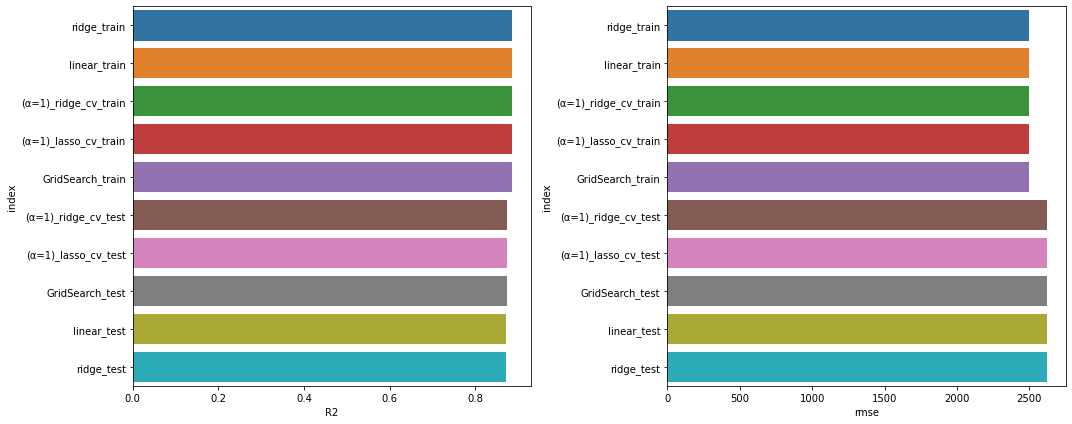

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.barplot(x = "R2", y = "index", data = r2_sort)

plt.subplot(122)
sns.barplot(x = "rmse", y = "index", data = rmse_sort)
plt.tight_layout();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___